Found 240 images belonging to 10 classes.
Found 60 images belonging to 10 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,268,426 (73.50 MB)

 Trainable params: 19,268,426 (73.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.1809 - loss: 2.1715 - val_accuracy: 0.2333 - val_loss: 1.6432
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.2901 - loss: 1.7113 - val_accuracy: 0.5333 - val_loss: 1.2498
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.4155 - loss: 1.3263 - val_accuracy: 0.4000 - val_loss: 1.2358
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.4517 - loss: 1.2646 - val_accuracy: 0.4500 - val_loss: 1.1326
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5177 - loss: 1.2132 - val_accuracy: 0.5000 - val_loss: 0.9372
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.4428 - loss: 1.1258 - val_accuracy: 0.5000 - val_loss: 1.1383
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.4941 - loss: 1.0929 - val_accuracy: 0.5833 - val_loss: 0.9302
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.5809 - loss: 0.9408 - val_accuracy: 0.5833 - val_loss: 0

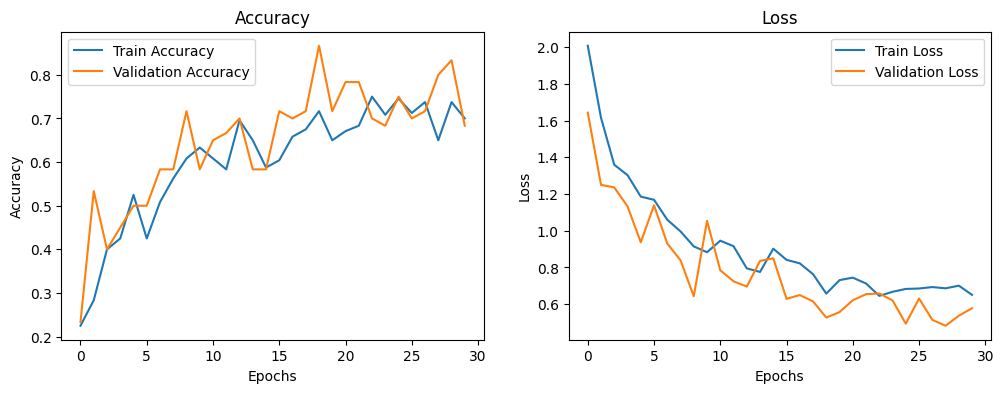

Model saved as bird_species_classifier.h5


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 10

#path for Kaggle dataset
BASE_DIR = '/kaggle/input/cub2002011/CUB_200_2011/images'

selected_classes = [
    '001.Black_footed_Albatross',
    '014.Indigo_Bunting',
    '050.Eared_Grebe',
    '061.Horned_Grebe',
    '073.Blue_Jay',
    '095.Baltimore_Oriole',
    '116.Painted_Bunting',
    '144.Pacific_Loon',
    '172.Green_tailed_Towhee',
    '199.Western_Meadowlark'
]

def create_bird_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        #1st convolutional block
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        #2nd convolutional block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        #3rd convolutional block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        #4th convolutional block
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        #flatten and dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation='softmax')  # Output layer for 25 classes
    ])
    return model

#graphs
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    #accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    #loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def main():
    #data augmentation and preprocessing
    datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        validation_split=0.2,
        horizontal_flip=True,
        rotation_range=30,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2
    )

    #training data generator
    train_generator = datagen.flow_from_directory(
        directory=BASE_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        classes=selected_classes
    )

    #validation data generator
    val_generator = datagen.flow_from_directory(
        directory=BASE_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        classes=selected_classes  # Only use the selected 25 species
    )

    #create model
    model = create_bird_cnn_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    #train model
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=30,
        verbose=1
    )

    #plot training curves
    plot_training_curves(history)

    #save model
    model.save('bird_species_classifier.h5')
    print("Model saved as bird_species_classifier.h5")

if __name__ == "__main__":
    main()